## Simulating a rolling ball - Two decoupled oscillators

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
x , y = np.meshgrid(np.linspace(-10,10,201), np.linspace(-10,10,201))
z = x**2 + y**2

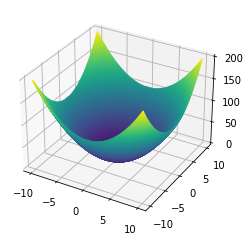

In [3]:
plotproj = plt.axes(projection = '3d')
plotproj.contour3D(x,y,z,200)

In [4]:
m = 1
U0 = 1
xi = 0.1

def f_ODE(t,r):
    x , y = r[0:2]
    vx , vy = r[2:4]
    return [vx,vy, -xi/m*vx -2*U0/m*x, -xi/m*vy -2*U0/m*y]

In [5]:
x0 = 0
y0 = 1
vx0 = 0
vy0 = 0
tStart = 0
tEnd = 100

solution = integrate.solve_ivp(f_ODE, [tStart,tEnd], [x0, y0, vx0, vy0], method = 'RK45', t_eval = np.linspace(tStart,tEnd,201))

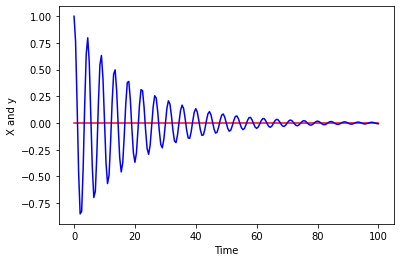

In [6]:
plt.xlabel('Time')
plt.ylabel('X and y')

plt.plot(solution.t, solution.y[0], 'red')
plt.plot(solution.t, solution.y[1], 'blue')

Text(0, 0.5, 'y')

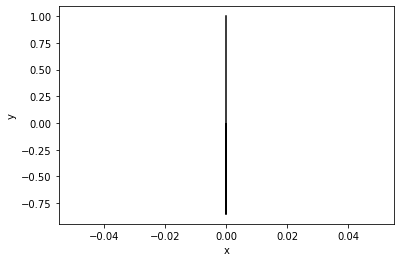

In [7]:
plt.plot(solution.y[0], solution.y[1], 'k')
plt.xlabel('x')
plt.ylabel('y')

## Different starting conditions and external forces acting on the ball

In [8]:
x0 = 3.7
y0 = -4.2
vx0 = 0.7
vy0 = -2.2
tStart = 0
tEnd = 100

solution = integrate.solve_ivp(f_ODE, [tStart,tEnd], [x0, y0, vx0, vy0], method = 'RK45', t_eval = np.linspace(tStart,tEnd,201))

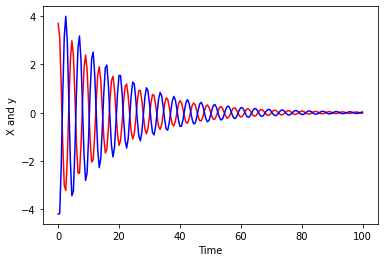

In [9]:
plt.xlabel('Time')
plt.ylabel('X and y')

plt.plot(solution.t, solution.y[0], 'red')
plt.plot(solution.t, solution.y[1], 'blue')

Text(0, 0.5, 'y')

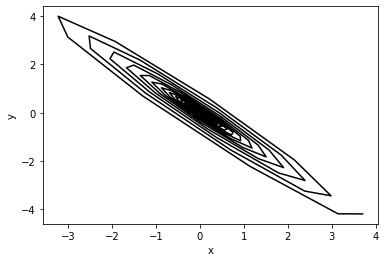

In [10]:
plt.plot(solution.y[0], solution.y[1], 'k')
plt.xlabel('x')
plt.ylabel('y')

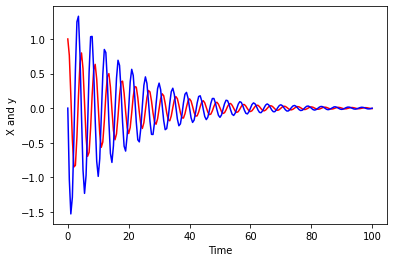

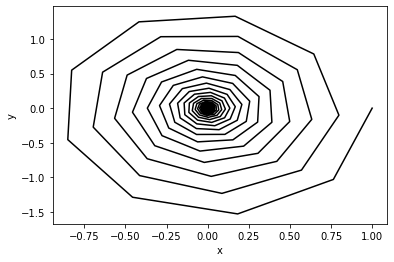

In [11]:
x0 = 1
y0 = 0
vx0 = 0
vy0 = -2.3
tStart = 0
tEnd = 100

solution = integrate.solve_ivp(f_ODE, [tStart,tEnd], [x0, y0, vx0, vy0], method = 'RK45', t_eval = np.linspace(tStart,tEnd,201))

plt.xlabel('Time')
plt.ylabel('X and y')

plt.plot(solution.t, solution.y[0], 'red')
plt.plot(solution.t, solution.y[1], 'blue')
plt.show()

plt.plot(solution.y[0], solution.y[1], 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### External Forces

In [12]:
m = 1
U0 = 1
xi = 0.1
A0 = 4
phi = 45/180 * np.pi
tOsc = 50

def f_ODE(t,r):
    x , y = r[0:2]
    vx , vy = r[2:4]
    return [vx,vy, -xi/m*vx -2*U0/m*x + A0*np.sin(2*np.pi*t/tOsc)*np.cos(phi), -xi/m*vy -2*U0/m*y + A0*np.sin(2*np.pi*t/tOsc)*np.sin(phi)]

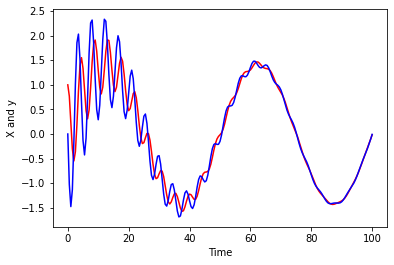

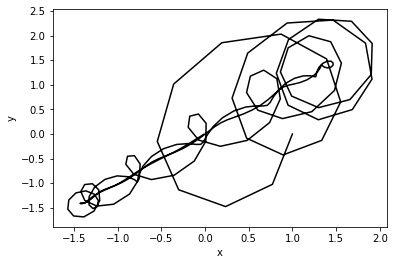

In [13]:
x0 = 1
y0 = 0
vx0 = 0
vy0 = -2.3
tStart = 0
tEnd = 100

solution = integrate.solve_ivp(f_ODE, [tStart,tEnd], [x0, y0, vx0, vy0], method = 'RK45', t_eval = np.linspace(tStart,tEnd,201))

plt.xlabel('Time')
plt.ylabel('X and y')

plt.plot(solution.t, solution.y[0], 'red')
plt.plot(solution.t, solution.y[1], 'blue')
plt.show()

plt.plot(solution.y[0], solution.y[1], 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Chaos and Lorenz System

In [14]:
def f_ODE(t,r,a,b,c):
    x,y,z = r
    x1 = a*(y - x)
    y1 = x*(b - z) - y
    z1 = x*y - c*z
    return [x1,y1,z1]

### Chaotic Solution: b > 24.74, two repulsive points exist

In [15]:
a = 10
b = 50
c = 8/3

tStart = 0
tEnd = 50

x0 = 1
y0 = 0
z0 = 0

solution = integrate.solve_ivp(f_ODE, [tStart,tEnd], [x0, y0, z0], method = 'RK45', t_eval = np.linspace(tStart,tEnd,5001), args = (a,b,c))

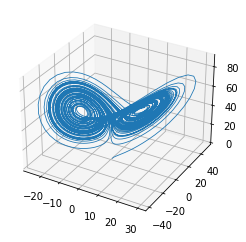

In [16]:
plottrajectory = plt.axes(projection = '3d')
plottrajectory.plot3D(solution.y[0],solution.y[1],solution.y[2], linewidth = 0.8)

In [17]:
solution2 = integrate.solve_ivp(f_ODE, [tStart,tEnd], [0.12*x0, y0, z0], method = 'RK45', t_eval = np.linspace(tStart,tEnd,5001), args = (a,b,c))

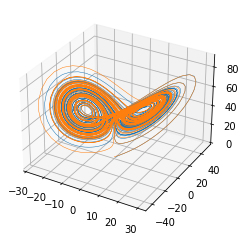

In [18]:
plottrajectory = plt.axes(projection = '3d')
plottrajectory.plot3D(solution.y[0],solution.y[1],solution.y[2], linewidth = 0.5)
plottrajectory.plot3D(solution2.y[0],solution2.y[1],solution2.y[2], linewidth = 0.5)
plt.savefig('Lorenz Trajectory', dpi = 300)

In [19]:
solution.y[:,-1]

array([-13.31946249, -10.33943138,  54.70557332])

In [20]:
solution2.y[:,-1]

array([-0.68877165,  9.65365484, 48.51440493])

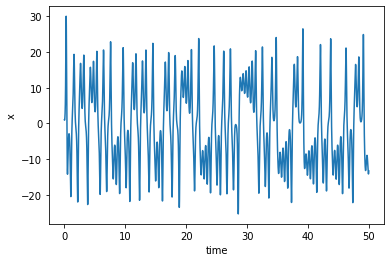

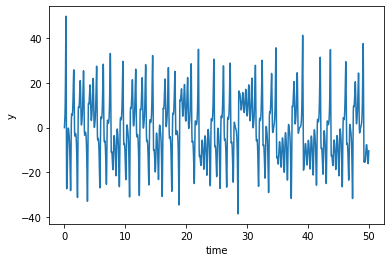

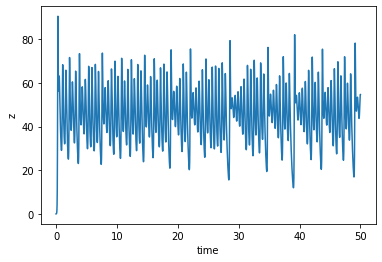

In [21]:
plt.plot(solution.t, solution.y[0])
plt.xlabel('time')
plt.ylabel('x')
plt.show()

plt.plot(solution.t, solution.y[1])
plt.xlabel('time')
plt.ylabel('y')
plt.show()

plt.plot(solution.t, solution.y[2])
plt.xlabel('time')
plt.ylabel('z')
plt.show()

### Non Chaotic Solution: b < 24.74 ,two points become attractive  

In [22]:
a = 10
b = 24
c = 8/3

tStart = 0
tEnd = 50

x0 = 1
y0 = 0
z0 = 0

solution = integrate.solve_ivp(f_ODE, [tStart,tEnd], [x0, y0, z0], method = 'RK45', t_eval = np.linspace(tStart,tEnd,5001), args = (a,b,c))
solution3 = integrate.solve_ivp(f_ODE, [tStart,tEnd], [0.12*x0, y0, z0], method = 'RK45', t_eval = np.linspace(tStart,tEnd,5001), args = (a,b,c))

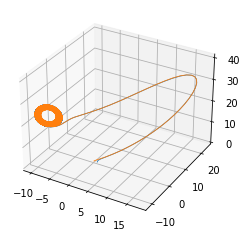

In [23]:
plottrajectory = plt.axes(projection = '3d')
plottrajectory.plot3D(solution.y[0],solution.y[1],solution.y[2], linewidth = 0.8)
plottrajectory.plot3D(solution3.y[0],solution3.y[1],solution3.y[2], linewidth = 0.8)
plt.savefig('Lorenz Trajectory2', dpi = 300)

This is a deterministic system and not chaotic.

## Heat Equation

### 1D

In [24]:
a = 1
dx = 1

def f_1D(t,u):
    u_new = np.zeros(len(u))
    u_new[1:-1] = u[:-2] + u[2:] - 2*u[1:-1]
    return u_new*a / dx**2

In [25]:
tStart = 0
tEnd = 5000

size = 100
u0 = np.zeros([size])
u0[0] = 1
solution = integrate.solve_ivp(f_1D, [tStart,tEnd], u0, method = 'RK45', t_eval = np.linspace(tStart,tEnd,10001))

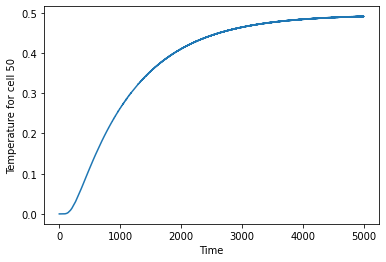

In [26]:
index = size//2
plt.xlabel('Time')
plt.ylabel('Temperature for cell ' + str(index))
plt.plot(solution.t, solution.y[index])

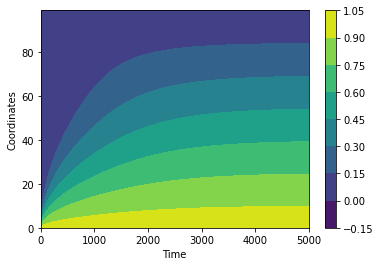

In [27]:
t_list, x_list = np.meshgrid(solution.t, np.arange(size))
plt.xlabel('Time')
plt.ylabel('Coordinates')
plt.contourf(t_list, x_list, solution.y)
plt.colorbar()

In [28]:
tStart = 0
tEnd = 2000

size = 100
u0 = np.zeros([size])
u0[0] = 1
u0[-1] = 1
solution = integrate.solve_ivp(f_1D, [tStart,tEnd], u0, method = 'RK45', t_eval = np.linspace(tStart,tEnd,10001))

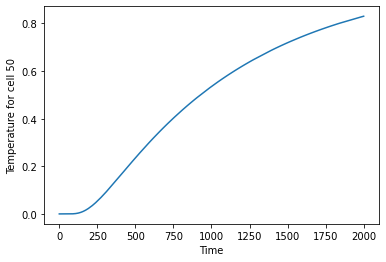

In [29]:
index = size//2
plt.xlabel('Time')
plt.ylabel('Temperature for cell ' + str(index))
plt.plot(solution.t, solution.y[index])

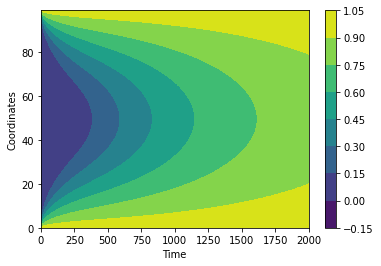

In [30]:
t_list, x_list = np.meshgrid(solution.t, np.arange(size))
plt.xlabel('Time')
plt.ylabel('Coordinates')
plt.contourf(t_list, x_list, solution.y)
plt.colorbar()

### 2D

In [31]:
a = 1
dx = 1
dy = 1

def f_2D(t,u):
    u_new = np.zeros([len(u),len(u)])
    u_new[1:-1, 1:-1] = (u[:-2,1:-1] + u[2:, 1:-1] - 2*u[1:-1, 1:-1])*a / dx**2 + (u[1:-1,:-2] + u[1:-1,2:] - 2*u[1:-1, 1:-1])*a / dy**2
    return u_new

sizex = 100
sizey = 100

def f_2D_flattened(t,u):
    u = u.reshape(sizex,sizey)
    u_new = np.zeros([len(u),len(u)])
    u_new[1:-1, 1:-1] = (u[:-2,1:-1] + u[2:, 1:-1] - 2*u[1:-1, 1:-1])*a / dx**2 + (u[1:-1,:-2] + u[1:-1,2:] - 2*u[1:-1, 1:-1])*a / dy**2
    return u_new.flatten()

In [32]:
tStart = 0
tEnd = 5000

u0 = np.zeros([sizex, sizey])
u0[0,:] = 1
u0[:,0] = 1

solution = integrate.solve_ivp(f_2D_flattened, [tStart,tEnd], u0.flatten(), method = 'RK45', t_eval = np.linspace(tStart,tEnd,10001))

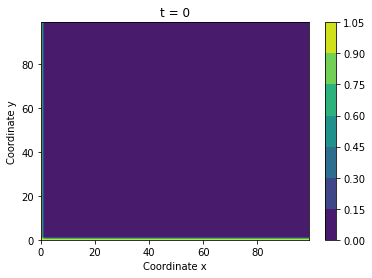

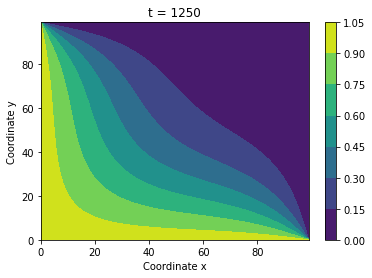

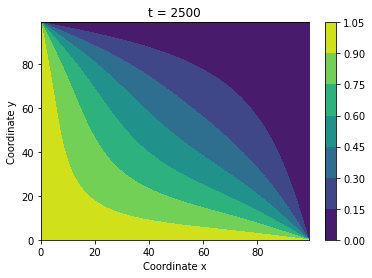

In [33]:
x_list, y_list = np.meshgrid(np.arange(sizex), np.arange(sizey))
tIndex = 0
plt.xlabel('Coordinate x')
plt.ylabel('Coordinate y')
plt.title('t = ' + str(tIndex))
plt.contourf(x_list, y_list, solution.y[:,tIndex].reshape(sizex, sizey))
plt.colorbar()
plt.show()

x_list, y_list = np.meshgrid(np.arange(sizex), np.arange(sizey))
tIndex = tEnd//4
plt.xlabel('Coordinate x')
plt.ylabel('Coordinate y')
plt.title('t = ' + str(tIndex))
plt.contourf(x_list, y_list, solution.y[:,tIndex].reshape(sizex, sizey))
plt.colorbar()
plt.show()

x_list, y_list = np.meshgrid(np.arange(sizex), np.arange(sizey))
tIndex = tEnd//2
plt.xlabel('Coordinate x')
plt.ylabel('Coordinate y')
plt.title('t = ' + str(tIndex))
plt.contourf(x_list, y_list, solution.y[:,tIndex].reshape(sizex, sizey))
plt.colorbar()
plt.show()

## 3-Body Problem

In [34]:
# Constants

G = 6.67430 * 10**(-11)

msun = 1.9884 * 10**30 # kg
mearth = 5.9723 * 10**24 # kg
mmoon = 7.349 * 10**22 # kg

rSunEarth = 1.4960 * 10**11 # m
rEarthMoon = 3.850 * 10**8 # m

vEarth = 29780 # Trajectory around sun in m/s
vMoon = 1022 # m/s

In [35]:
m1 = msun
m2 = mearth
m3 = mmoon

def f_ODE(t,r):
    r1 = r[0:3]
    r2 = r[3:6]
    r3 = r[6:9]
    # v1 = r[9:12]
    r12 = np.linalg.norm(r1 - r2)
    r23 = np.linalg.norm(r2 - r3)
    r31 = np.linalg.norm(r3 - r1)
    
    eqr = G*np.array([
        - (m2/r12**3 + m3/r31**3)*r1 + m2/r12**3 * r2 + m3/r31**3 * r3,
        m1/r12**3 * r1 - (m1/r12**3 + m3/r23**3) * r2 + m3/r23**3 * r3,
        m1/r31**3 * r1 + m2/r23**3 * r2 - (m1/r31**3 + m2/r23**3) * r3
    ])
    return np.concatenate([r[9:18], eqr.flatten()])

In [36]:
# Sun
r1start = np.array([0,0,0])
v1start = np.array([0,0,0])

# Earth
r2start = np.array([rSunEarth,0,0])
v2start = np.array([0,vEarth,0])

# Moon
r3start = np.array([rSunEarth,rEarthMoon,0])
v3start = np.array([-vMoon,vEarth,0])

r0 = np.concatenate([r1start, r2start, r3start, v1start, v2start, v3start])

In [37]:
f_ODE(0,r0)

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.97800000e+04,  0.00000000e+00, -1.02200000e+03,  2.97800000e+04,
        0.00000000e+00,  1.80299923e-08,  5.64021430e-13,  0.00000000e+00,
       -5.92988527e-03,  3.30911997e-05,  0.00000000e+00, -5.92982636e-03,
       -2.70447778e-03,  0.00000000e+00])

In [38]:
tStart = 0
tEnd = 60*60*24*365.25*2

solution = integrate.solve_ivp(f_ODE, [tStart,tEnd], r0, method = 'RK45', t_eval = np.linspace(tStart,tEnd,100001), rtol = 1e-6, atol = 1e-11)

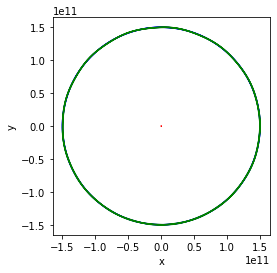

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x')
plt.ylabel('y')

plt.plot(solution.y[0], solution.y[1],'red')
plt.plot(solution.y[3], solution.y[4],'blue')
plt.plot(solution.y[6], solution.y[7],'green')

### Sun

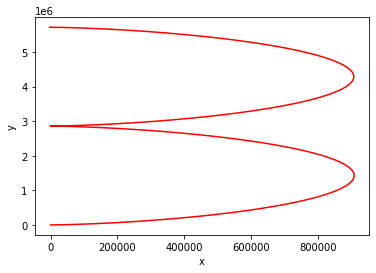

In [40]:
plt.xlabel('x')
plt.ylabel('y')

plt.plot(solution.y[0], solution.y[1],'red')

### Earth

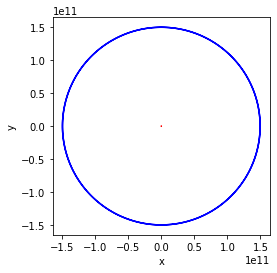

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x')
plt.ylabel('y')

plt.plot(solution.y[0], solution.y[1],'red')
plt.plot(solution.y[3], solution.y[4],'blue')

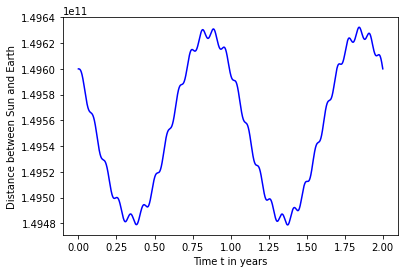

In [42]:
plt.xlabel('Time t in years')
plt.ylabel('Distance between Sun and Earth')

plt.plot(solution.t/(60*60*24*365.25), np.linalg.norm(solution.y[0:3] - solution.y[3:6], axis = 0) ,'blue')

### Moon

###  Moon orbit around Earth

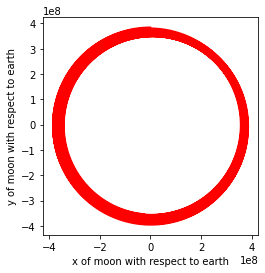

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x of moon with respect to earth')
plt.ylabel('y of moon with respect to earth')

plt.plot(solution.y[6] - solution.y[3], solution.y[7] - solution.y[4],'red')

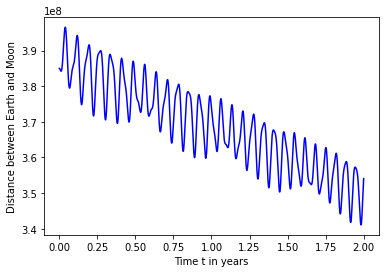

In [44]:
plt.xlabel('Time t in years')
plt.ylabel('Distance between Earth and Moon')

plt.plot(solution.t/(60*60*24*365.25), np.linalg.norm(solution.y[3:6] - solution.y[6:9], axis = 0) ,'blue')

### Exaggerate moon orbit radius

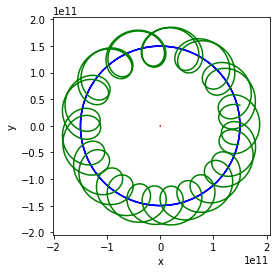

In [51]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x')
plt.ylabel('y')

plt.plot(solution.y[0], solution.y[1],'red')
plt.plot(solution.y[3], solution.y[4],'blue')
plt.plot(solution.y[3] + 100*(solution.y[6] - solution.y[3]), solution.y[4] + 100*(solution.y[7] - solution.y[4]) ,'green')